### Movie Recommendation system

In [198]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
# importing datasets
movies_df = pd.read_csv('./Dataset_original/movies.csv')
ratings_df = pd.read_csv('./Dataset_original/ratings.csv')

#### Movies Dataset

In [200]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [201]:
#Checking shape of dataset
movies_df.shape

(10329, 3)

In [202]:
#Checking datatypes
print(movies_df.dtypes)

movieId     int64
title      object
genres     object
dtype: object


In [203]:
#Describing data
movies_df.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


#### Ratings Dataset

In [204]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [205]:
#Checking shape of dataset
ratings_df.shape

(105339, 4)

In [206]:
#Checking datatypes
print(ratings_df.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [207]:
#Describing data
ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [208]:
#Converting datetype
ratings_df["timestamp"]= pd.to_datetime(ratings_df.timestamp)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1970-01-01 00:00:01.217897793
1,1,24,1.5,1970-01-01 00:00:01.217895807
2,1,32,4.0,1970-01-01 00:00:01.217896246
3,1,47,4.0,1970-01-01 00:00:01.217896556
4,1,50,4.0,1970-01-01 00:00:01.217896523


#### Combined Dataset

In [209]:
#Merging datasets on movie_id
all_movies  = pd.merge(left=movies_df, right=ratings_df, how='left', on = 'movieId')
all_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,1970-01-01 00:00:00.859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1970-01-01 00:00:01.303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,1970-01-01 00:00:00.858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,1970-01-01 00:00:00.850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,1970-01-01 00:00:00.851766286
...,...,...,...,...,...,...
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1970-01-01 00:00:01.451213043
105339,148626,The Big Short (2015),Drama,458.0,4.0,1970-01-01 00:00:01.452014749
105340,148626,The Big Short (2015),Drama,576.0,4.5,1970-01-01 00:00:01.451687664
105341,148626,The Big Short (2015),Drama,668.0,4.5,1970-01-01 00:00:01.451148148


In [210]:
#Describing data
all_movies.describe()

,movieId,userId,rating
count,105343.000000,105339.000000,105339.000000
mean,13382.696373,364.924539,3.516850
std,26172.698128,197.486905,1.044872
min,1.000000,1.000000,0.500000
25%,1073.000000,192.000000,3.000000
50%,2497.000000,383.000000,3.500000
75%,5991.000000,557.000000,4.000000
max,149532.000000,668.000000,5.000000


In [211]:
# Checking NULL values per variable
amount_of_null_values_per_row = all_movies.isnull().sum(axis=1)
pd.Series(amount_of_null_values_per_row).value_counts()

0    105339
3         4
dtype: int64

In [212]:
# Checking NULL values per column in relation to all values of a column
def missing_values_table(df):
    mis_val = all_movies.isnull().sum()
    mis_val_percent = 100 * all_movies.isnull().sum()/len(all_movies)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(all_movies)

,Missing Values,% of Total Values
movieId,0,0.000000
title,0,0.000000
genres,0,0.000000
userId,4,0.003797
rating,4,0.003797
timestamp,4,0.003797


In [213]:
# Checking NULL values per variable
missing = all_movies.isnull().sum().sort_values(ascending=False)
missing

timestamp    4
rating       4
userId       4
genres       0
title        0
movieId      0
dtype: int64

In [214]:
# Dropping NULL values
all_movies.dropna(inplace=True) 

#### Examine the variables and remove the outliers

In [215]:
all_users_pivot = all_movies.pivot_table(all_movies,index=["userId"],aggfunc=[np.mean,len])
all_users_pivot

mean              len                                
             movieId    rating genres movieId  rating timestamp title
userId                                                               
1.0      6250.053097  3.628319    113     113   113.0       113   113
2.0       393.068966  3.896552     29      29    29.0        29    29
3.0       382.958904  3.794521     73      73    73.0        73    73
4.0      1669.096774  4.161290    124     124   124.0       124   124
5.0     18062.250000  3.183824     68      68    68.0        68    68
...              ...       ...    ...     ...     ...       ...   ...
664.0   22590.229730  4.067568     74      74    74.0        74    74
665.0   37849.180617  3.211454    227     227   227.0       227   227
666.0    2483.093333  3.342222    225     225   225.0       225   225
667.0    2374.108108  3.790541     74      74    74.0        74    74
668.0   33432.974639  2.797200   5678    5678  5678.0      5678  5678

[668 rows x 7 columns]

In [216]:
all_users_pivot.describe()

mean                      len                            \
            movieId      rating       genres      movieId       rating   
count    668.000000  668.000000   668.000000   668.000000   668.000000   
mean    9494.576657    3.663391   157.693114   157.693114   157.693114   
std    14085.577052    0.456034   319.712512   319.712512   319.712512   
min      206.181818    1.975000    20.000000    20.000000    20.000000   
25%     1260.906481    3.399579    35.000000    35.000000    35.000000   
50%     2596.532880    3.684211    70.500000    70.500000    70.500000   
75%    12641.882539    3.982380   153.000000   153.000000   153.000000   
max    94728.163636    5.000000  5678.000000  5678.000000  5678.000000   

                                 
         timestamp        title  
count   668.000000   668.000000  
mean    157.693114   157.693114  
std     319.712512   319.712512  
min      20.000000    20.000000  
25%      35.000000    35.000000  
50%      70.500000    70.500000  
75%     153.000000   153.000000  
max    5678.000000  5678.000000

In [217]:
all_movies_clean = all_movies[(all_movies["userId"]<=667)]
all_movies_clean

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,1970-01-01 00:00:00.859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1970-01-01 00:00:01.303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,1970-01-01 00:00:00.858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,1970-01-01 00:00:00.850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,1970-01-01 00:00:00.851766286
...,...,...,...,...,...,...
105337,146878,Le Grand Restaurant (1966),Comedy,622.0,2.5,1970-01-01 00:00:01.447514637
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1970-01-01 00:00:01.451213043
105339,148626,The Big Short (2015),Drama,458.0,4.0,1970-01-01 00:00:01.452014749
105340,148626,The Big Short (2015),Drama,576.0,4.5,1970-01-01 00:00:01.451687664


In [218]:
#### save dataset with pickle

### Visualise relations between different varibales 

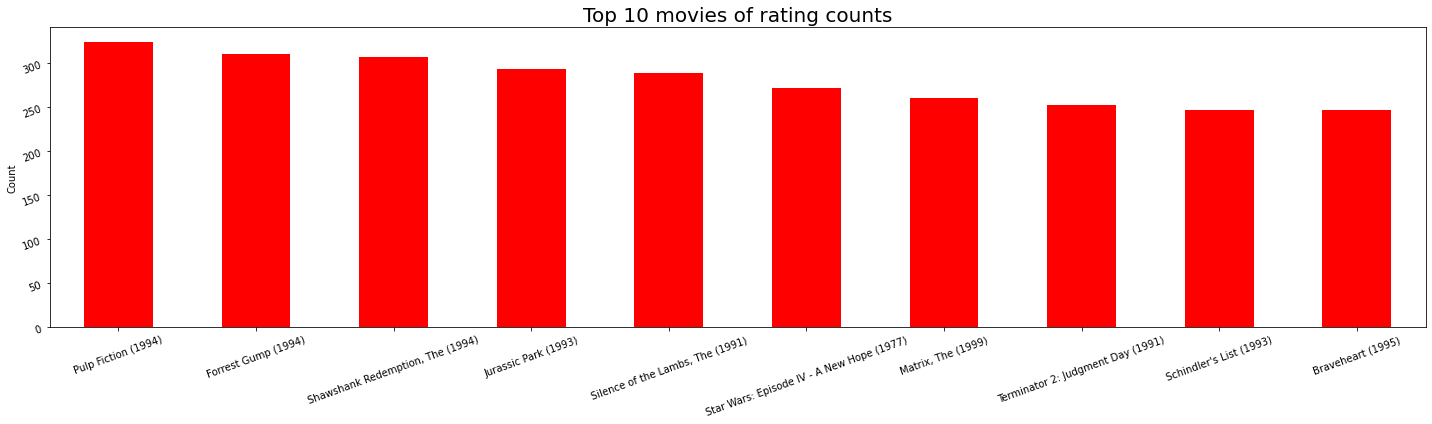

In [219]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,6))
all_movies_clean['title'].value_counts()[:10].plot(kind = 'bar', ax = ax, color="red")
ax.set_title('Top 10 movies of rating counts', fontsize = 20)
ax.tick_params(labelrotation = 20)
ax.set_ylabel('Movies Title')
ax.set_ylabel('Count')
plt.tight_layout()

In [220]:
ratings_clean = ratings_df[(ratings_df["userId"]<=667)]
ratings_clean

,userId,movieId,rating,timestamp
0,1,16,4.0,1970-01-01 00:00:01.217897793
1,1,24,1.5,1970-01-01 00:00:01.217895807
2,1,32,4.0,1970-01-01 00:00:01.217896246
3,1,47,4.0,1970-01-01 00:00:01.217896556
4,1,50,4.0,1970-01-01 00:00:01.217896523
...,...,...,...,...
99656,667,5992,5.0,1970-01-01 00:00:01.082471985
99657,667,6539,4.0,1970-01-01 00:00:01.082551946
99658,667,7153,4.0,1970-01-01 00:00:01.083274152
99659,667,7160,4.5,1970-01-01 00:00:01.082472021


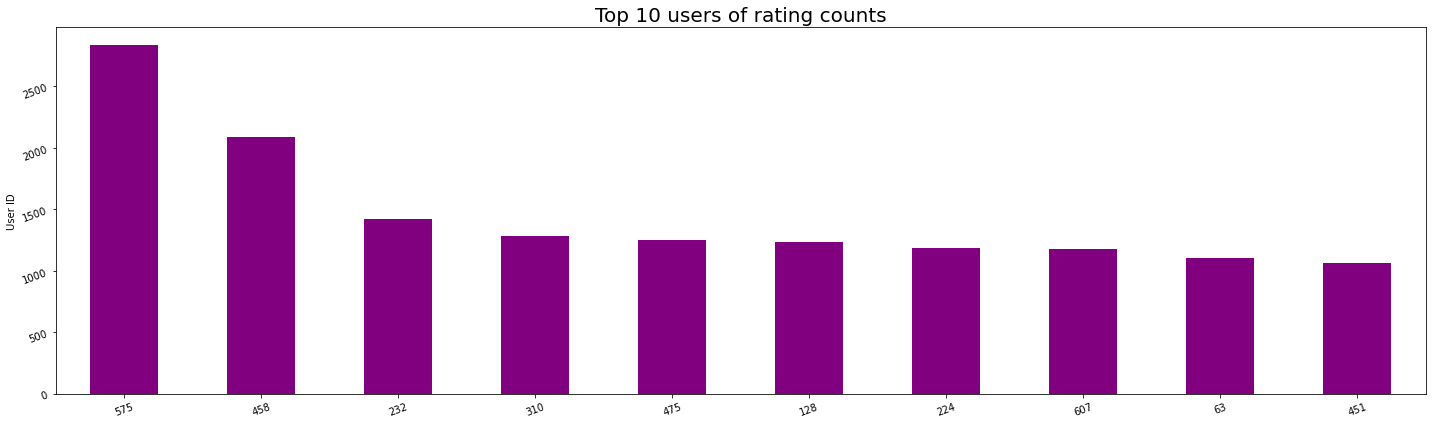

In [221]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,6))
ratings_clean['userId'].value_counts()[:10].plot(kind = 'bar', ax = ax, color="purple")
ax.set_title('Top 10 users of rating counts', fontsize = 20)
ax.tick_params(labelrotation = 20)
ax.set_ylabel('Count')
ax.set_ylabel('User ID')
plt.tight_layout()

In [222]:
all_movies_clean["year"] = all_movies_clean["title"].str.extract("\((\d{4})\)", expand=True)
year_counts = all_movies_clean[["title", "year"]].groupby("year").size()

<ipython-input-222-36f1c4dfd73d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_movies_clean["year"] = all_movies_clean["title"].str.extract("\((\d{4})\)", expand=True)


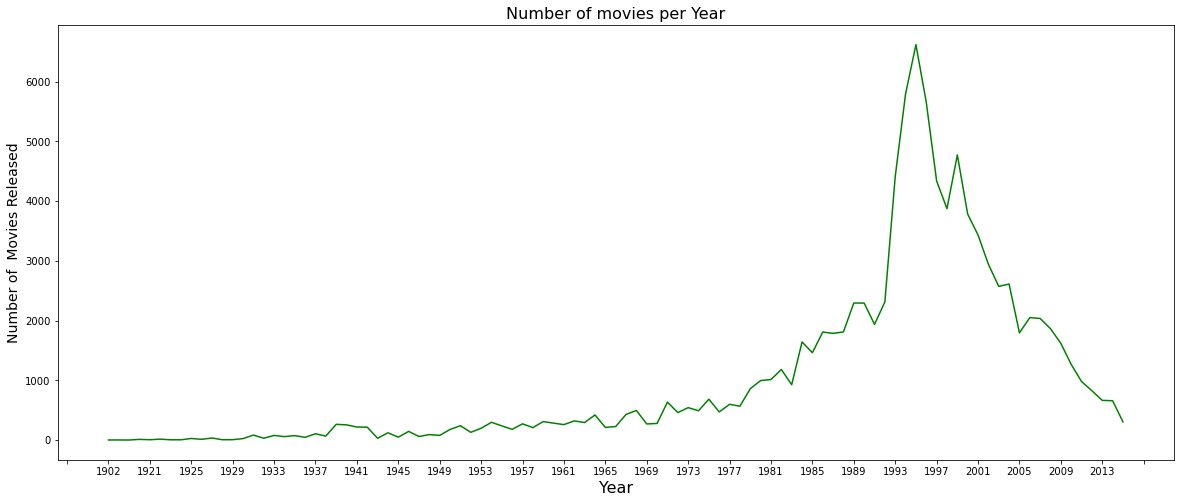

In [223]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(year_counts.index, year_counts.values,color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(30)) 
plt.title("Number of movies per Year", fontsize=16)
plt.xlabel("Year", fontsize= 16)
plt.ylabel("Number of  Movies Released", fontsize=14)
plt.show()

In [224]:
movies_df['genres'] = movies_df['genres'].replace(to_replace="(no genres listed)", value="") 
generlist = movies_df['genres'].apply(lambda allgeners : str(allgeners).split("|"))
generlist

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
10324                        [Animation, Children, Comedy]
10325                                             [Comedy]
10326                                             [Comedy]
10327                                              [Drama]
10328                                                   []
Name: genres, Length: 10329, dtype: object

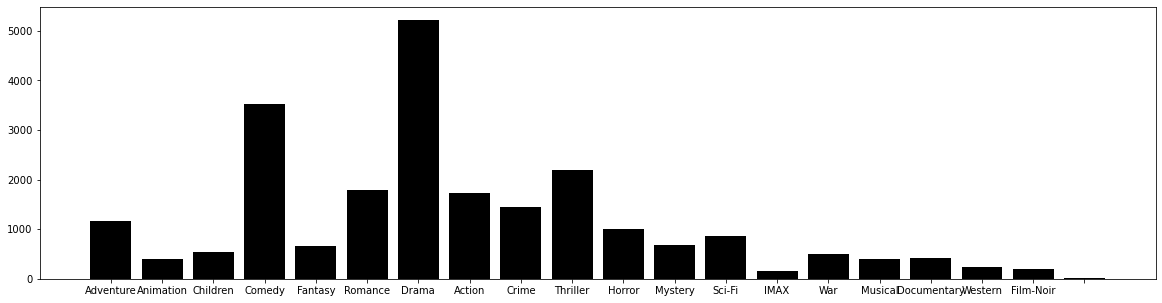

In [225]:
plt.figure(figsize=(20,5))
count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(count.get(gener,False)):
            count[gener]=count[gener]+1
        else:
            count[gener] = 1       
plt.bar(count.keys(),count.values(),color='black')
plt.show()

### Building clusters based on average rating

In [226]:
ratings = ratings_clean
movies = movies_df
genres= ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir' ]
column_names = ['avg_Adventure', 'avg_Animation', 'avg_Children', 'avg_Comedy', 'avg_Fantasy', 'avg_Romance', 'avg_Drama', 'avg_Action', 'avg_Crime', 'avg_Thriller', 'avg_Horror', 'avg_Mystery', 'avg_Sci-Fi', 'avg_IMAX', 'avg_War', 'avg_Musical', 'avg_Documentary', 'avg_Western', 'avg_Film-Noir' ]
genre_ratings = pd.DataFrame()
for genre in genres:        
  genre_movies = movies[movies['genres'].str.contains(genre) ]
  avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
  genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
genre_ratings.columns = column_names
genre_ratings.head()

,avg_Adventure,avg_Animation,avg_Children,avg_Comedy,avg_Fantasy,avg_Romance,avg_Drama,avg_Action,avg_Crime,avg_Thriller,avg_Horror,avg_Mystery,avg_Sci-Fi,avg_IMAX,avg_War,avg_Musical,avg_Documentary,avg_Western,avg_Film-Noir
1,3.69,4.00,3.17,3.27,3.81,3.34,3.84,3.83,4.21,3.87,3.69,3.81,3.40,3.88,4.20,4.00,0.5,3.5,4.00
2,4.00,4.50,4.33,3.55,4.25,3.75,4.36,3.89,4.33,3.92,NaN,3.50,3.80,NaN,NaN,4.00,NaN,NaN,NaN
3,3.44,3.50,3.80,3.74,3.40,3.64,3.97,3.23,4.00,3.71,4.00,4.25,3.33,4.00,3.67,3.67,5.0,4.0,NaN
4,4.24,4.75,4.33,4.02,4.25,4.16,4.34,3.79,3.94,3.72,3.50,4.40,4.33,NaN,4.56,4.33,NaN,4.2,4.33
5,3.55,4.10,3.90,3.44,3.84,3.74,2.68,2.76,2.58,1.77,3.00,2.67,3.67,4.28,0.50,4.09,NaN,NaN,NaN


In [227]:
genre_ratings_cleaned=genre_ratings.dropna(axis=0, how='any')

In [228]:
genre_ratings_cleaned.head()

,avg_Adventure,avg_Animation,avg_Children,avg_Comedy,avg_Fantasy,avg_Romance,avg_Drama,avg_Action,avg_Crime,avg_Thriller,avg_Horror,avg_Mystery,avg_Sci-Fi,avg_IMAX,avg_War,avg_Musical,avg_Documentary,avg_Western,avg_Film-Noir
1,3.69,4.00,3.17,3.27,3.81,3.34,3.84,3.83,4.21,3.87,3.69,3.81,3.40,3.88,4.20,4.00,0.5,3.50,4.0
7,3.57,3.50,2.40,3.50,3.21,3.83,3.44,3.74,3.85,3.72,3.57,3.86,3.54,3.17,3.64,5.00,4.0,3.00,5.0
22,2.81,3.77,3.10,3.10,3.11,3.22,3.45,2.73,3.39,3.23,3.10,3.43,2.82,4.50,2.55,2.72,2.5,2.00,3.5
28,3.44,3.75,3.62,3.43,3.09,3.71,3.55,3.25,3.40,3.32,4.00,3.60,3.71,4.00,3.15,3.67,4.0,3.17,4.0
44,3.28,3.42,3.63,3.37,3.58,3.52,3.20,3.16,3.12,3.20,3.27,3.58,3.35,0.50,3.22,3.08,4.5,3.20,4.5


In [229]:
X = genre_ratings_cleaned

In [243]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1234)
kmeans.fit(X)

KMeans(random_state=1234)

In [244]:
clusters = kmeans.predict(X) # gives us the cluster labels

# Check the size of the clusters
print(pd.Series(clusters).value_counts().sort_index())


0    33
1    20
2     7
3    18
4     4
5    29
6     1
7     6
dtype: int64


In [245]:
kmeans.inertia_

312.74486564362843

[1, 2, 3, 4, 5, 6, 7, 8]
[809.9301245762709, 526.2811040726816, 430.01725575757575, 397.819306969697, 364.0373856966847, 344.76371153530386, 326.4609455844157, 312.74486564362843]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

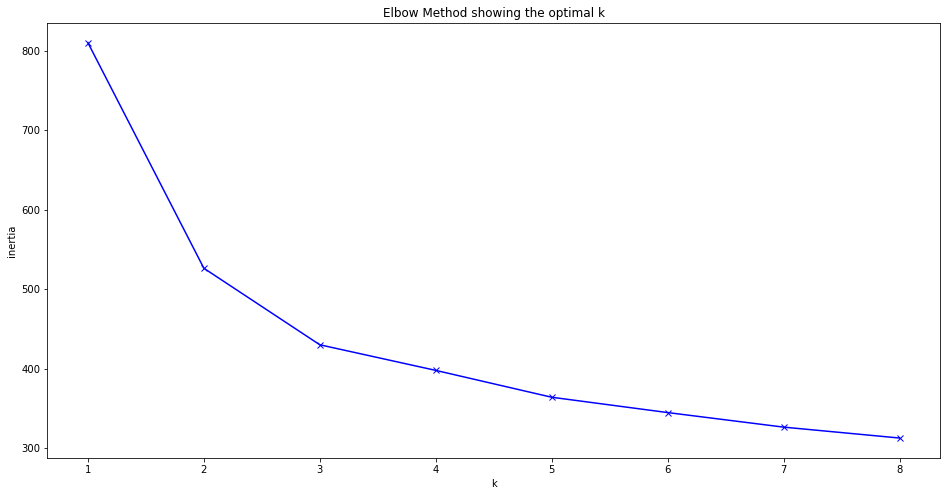

In [246]:
K = range(1, 9)
print(list(K))
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

print(inertia)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.2929416756703376, 0.22570965156672565, 0.20581916459907815, 0.204100578178314, 0.15619372564354808, 0.1619405060363708, 0.17599802176067428, 0.14780246905410235, 0.1333559197207912, 0.13661891941522514, 0.13324733900464475, 0.11441563566801383, 0.10683167081990495]


Text(0.5, 1.0, 'Silhouette Score showing the optimal k')

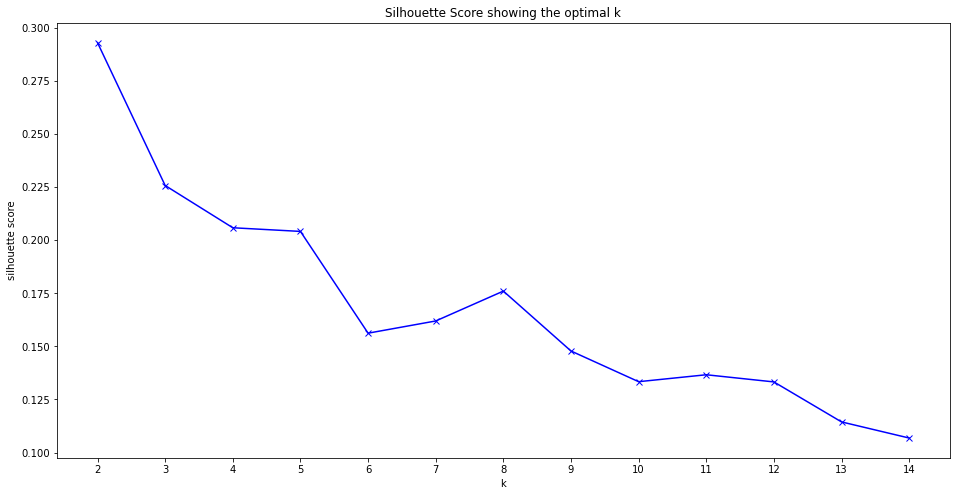

In [247]:
from sklearn.metrics import silhouette_score

K = range(2, 15)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))

print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score showing the optimal k')

In [248]:
from sklearn import datasets
X_pca = genre_ratings_cleaned
pd.DataFrame(X_pca)

,avg_Adventure,avg_Animation,avg_Children,avg_Comedy,avg_Fantasy,avg_Romance,avg_Drama,avg_Action,avg_Crime,avg_Thriller,avg_Horror,avg_Mystery,avg_Sci-Fi,avg_IMAX,avg_War,avg_Musical,avg_Documentary,avg_Western,avg_Film-Noir
1,3.69,4.00,3.17,3.27,3.81,3.34,3.84,3.83,4.21,3.87,3.69,3.81,3.40,3.88,4.20,4.00,0.50,3.50,4.00
7,3.57,3.50,2.40,3.50,3.21,3.83,3.44,3.74,3.85,3.72,3.57,3.86,3.54,3.17,3.64,5.00,4.00,3.00,5.00
22,2.81,3.77,3.10,3.10,3.11,3.22,3.45,2.73,3.39,3.23,3.10,3.43,2.82,4.50,2.55,2.72,2.50,2.00,3.50
28,3.44,3.75,3.62,3.43,3.09,3.71,3.55,3.25,3.40,3.32,4.00,3.60,3.71,4.00,3.15,3.67,4.00,3.17,4.00
44,3.28,3.42,3.63,3.37,3.58,3.52,3.20,3.16,3.12,3.20,3.27,3.58,3.35,0.50,3.22,3.08,4.50,3.20,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,3.42,3.94,3.64,3.58,3.45,3.51,3.68,3.22,3.52,3.34,3.21,3.63,3.30,2.59,3.65,3.53,4.14,3.63,4.07
628,4.17,4.25,3.94,4.19,4.25,4.07,4.26,4.12,4.25,4.16,4.17,4.00,4.19,4.33,4.35,4.38,4.60,3.70,4.50
634,3.12,2.00,3.00,3.35,3.44,3.64,3.80,2.95,3.50,3.46,3.62,3.71,3.58,3.50,4.36,2.25,5.00,4.00,4.50
642,3.61,3.67,2.94,2.50,3.37,3.81,3.68,3.34,3.43,3.84,3.43,3.89,3.63,3.19,3.73,1.25,3.42,4.62,4.00


In [249]:
from sklearn.decomposition import PCA

In [250]:
pca = PCA()
pca.fit(X_pca)
components = pca.transform(X_pca)
print(pd.DataFrame(components))

           0         1         2         3         4         5         6   \
0   -0.260522  1.837455 -2.767120  0.697862 -0.152993 -0.210916  0.386248   
1   -0.554281 -0.795696 -0.290806  0.080052 -1.328566 -0.365203  1.116885   
2    1.819550  1.364525 -0.374482 -0.712969 -1.009568  0.448929 -0.809798   
3   -0.215940  0.211511  0.442944 -0.177092 -0.601356  0.200254 -0.606248   
4    1.138245 -2.030893  0.578284  1.760148 -0.287553 -0.963662 -0.420579   
..        ...       ...       ...       ...       ...       ...       ...   
113  0.017924 -0.652746  0.343360  0.469409  0.039320 -0.714167 -0.258569   
114 -2.967837 -0.005980  0.245415  0.087986 -0.599187  0.183214  0.030194   
115  0.111796 -1.800270  0.293372 -0.825898  0.396958  1.167762 -0.037876   
116  0.461204 -0.874908 -0.973961  0.061471  1.323689  1.142564 -1.120641   
117  1.106066  0.017602  0.864000 -0.271503 -0.088033  0.250979  0.036364   

           7         8         9         10        11        12        13  

In [251]:
round(pd.DataFrame(pca.explained_variance_ratio_), 5)

,0
0,0.55611
1,0.10525
2,0.08537
3,0.06465
4,0.04676
5,0.03173
6,0.02164
7,0.01789
8,0.01467
9,0.01337


### Recommendation Engine

In [239]:
### User-item-matrix

In [240]:
user_item_matrix = ratings_clean.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
user_item_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,658,659,660,661,662,663,664,665,666,667
0,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,5.0,3.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
user_item_matrix.fillna(0,inplace=True)
user_item_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,658,659,660,661,662,663,664,665,666,667
0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
